In [1]:
# Import the required modules
import pandas as pd
from pathlib import Path
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np


## Step 1: Read in the dataset about autism in toddlers

In [2]:
# Read the usage_stats.csv file from the Resources folder into a Pandas DataFrame
toddler_autism_df = pd.read_csv(
    Path("Resources/Toddler Autism dataset July 2018.csv")
)

# Review the DataFrame
display(toddler_autism_df.head())

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
toddler_autism_df.dtypes


Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

## Step 2: Split the data into X and y and then into testing and training sets.

In [4]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = toddler_autism_df['Class/ASD Traits ']

# The X variable should include all features except the target
X = toddler_autism_df.drop(columns=['Class/ASD Traits ', 'Case_No', 'Qchat-10-Score', 'Ethnicity', 'Who completed the test'])

# Convert categorical columns to numerical using get_dummies
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)


In [5]:
y = pd.get_dummies(y, drop_first=True, dtype=int)

In [6]:
X.dtypes

A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Sex_m                      int64
Jaundice_yes               int64
Family_mem_with_ASD_yes    int64
dtype: object

In [7]:
toddler_autism_scaled = StandardScaler().fit_transform(X[["A1", 
                                                          "A2",
                                                          "A3",
                                                          "A4",
                                                          "A5",
                                                          "A6",
                                                          "A7",
                                                          "A8",
                                                          "A9",
                                                          "A10",
                                                          "Age_Mons",
                                                          "Sex_m",
                                                          "Jaundice_yes",
                                                          "Family_mem_with_ASD_yes"
]])


In [8]:
toddler_autism_transformed = pd.DataFrame(toddler_autism_scaled, columns=["A1", 
                                                                          "A2",
                                                                          "A3",
                                                                          "A4",
                                                                          "A5",
                                                                          "A6",
                                                                          "A7",
                                                                          "A8",
                                                                          "A9",
                                                                          "A10",
                                                                          "Age_Mons",
                                                                          "Sex_m",
                                                                          "Jaundice_yes",
                                                                          "Family_mem_with_ASD_yes"])

# Display sample data
toddler_autism_transformed.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex_m,Jaundice_yes,Family_mem_with_ASD_yes
0,-1.136356,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,0.733952,1.085212,-0.979340,0.839941,0.016652,-1.517918,1.630865,-0.438529
1,0.880006,1.108300,-0.818758,-1.024980,-1.050615,0.856477,0.733952,-0.921479,-0.979340,-1.190559,1.019590,0.658797,1.630865,-0.438529
2,0.880006,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,0.733952,1.085212,-0.979340,0.839941,1.019590,0.658797,1.630865,-0.438529
3,0.880006,1.108300,1.221362,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,-0.484817,0.658797,-0.613171,-0.438529
4,0.880006,1.108300,-0.818758,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,-0.986286,-1.517918,-0.613171,2.280351


In [9]:
print(type(y))
if isinstance(y, np.ndarray):  # If y is a numpy array
    print(y.shape)

<class 'pandas.core.frame.DataFrame'>


In [10]:
y = y.iloc[:, 0]

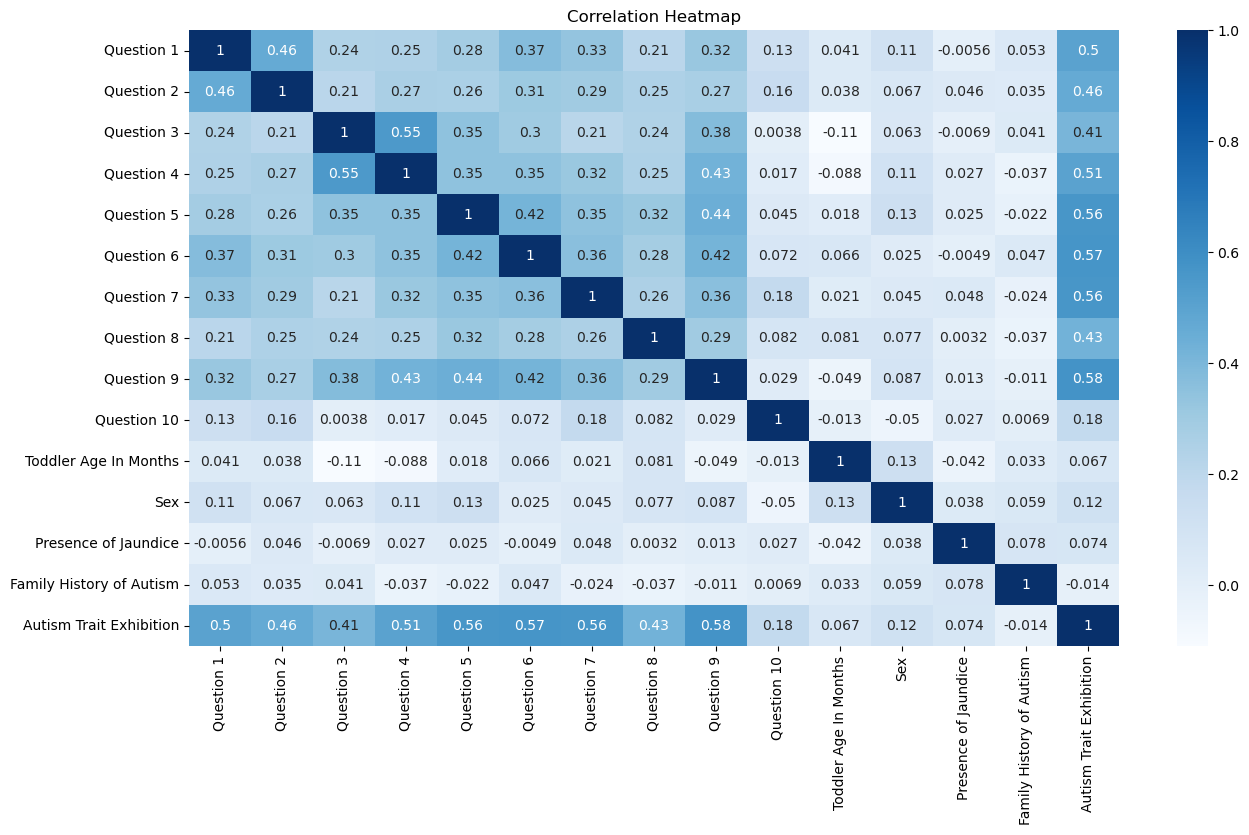

In [11]:
# Create a correlation heatmap for all of the features 
X_corr = X.copy()
X_corr["y"] = y

# Rename columns
new_column_names = {
    'A1': 'Question 1',
    'A2': 'Question 2',
    'A3': 'Question 3',
    'A4': 'Question 4',
    'A5': 'Question 5',
    'A6': 'Question 6',
    'A7': 'Question 7',
    'A8': 'Question 8',
    'A9': 'Question 9',
    'A10': 'Question 10',
    'Age_Mons': 'Toddler Age In Months',
    'Sex_m': 'Sex',
    'Jaundice_yes': 'Presence of Jaundice',
    'Family_mem_with_ASD_yes': 'Family History of Autism',
    'y': 'Autism Trait Exhibition'
}
X_corr.rename(columns=new_column_names, inplace=True)

corr = X_corr.corr()

# Set up the matplotlib figure with desired size
fig, ax = plt.subplots(figsize=(15, 8))  # You can adjust the size values to your preference

# Draw the heatmap
sb.heatmap(corr, cmap="Blues", annot=True, ax=ax)

# Set a title for the heatmap
ax.set_title('Correlation Heatmap')

# Show the plot
plt.show()


In [10]:
y.shape

(1054, 1)

In [11]:
X.shape

(1054, 14)

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Create a synthetic imbalanced dataset (replace this with your dataset)
X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, random_state=1)

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply random undersampling to balance the classes
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the class distribution after undersampling
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution after undersampling:", class_distribution)

Class distribution after undersampling: {0: 105, 1: 105}


In [13]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

## Step 3: Fit a logistic regression classifier.

In [14]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=2)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

## Step 4: Create the predicted values for the testing and the training data.

In [15]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = lr_model.predict(X_test)


## Step 5: Print a confusion matrix for the training data.

In [16]:
# Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[70 11]
 [10 66]]


## Step 6: Print a confusion matrix for the testing data.

In [17]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[16  8]
 [ 7 22]]


## Step 7: Print the training classification report.

In [18]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        81
           1       0.86      0.87      0.86        76

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.87       157
weighted avg       0.87      0.87      0.87       157



## Step 8: Print the testing classification report.

In [19]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        24
           1       0.73      0.76      0.75        29

    accuracy                           0.72        53
   macro avg       0.71      0.71      0.71        53
weighted avg       0.72      0.72      0.72        53



## Step 9: Answer the following question

> **Question**: 

> **Sample Answer**: 